# Assignment 2: Compare Tests for Goodness of fit

#### Test that in fact binomial and Poisson distribution look increasingly more similar to Gaussians as the mean of the distribution increases.

## Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using: 
    
    1) KS
    
    2) AD
    
    3) KL
    
    4) Pearson's chisq 

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

#import os

#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load(open(os.getenv('PUI2017') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


### example from skeleton notebook: testing AD and KS test of normal dist

# AD and KS test

In [2]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("")

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



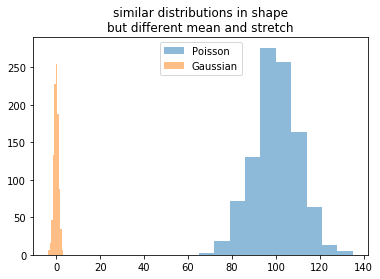

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussianbut I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


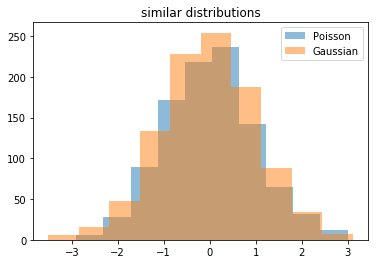

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


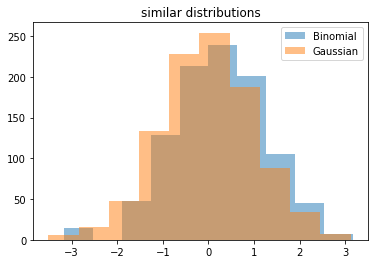

binomial vs normal KstestResult(statistic=0.14200000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=15.852273853456722, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [3]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")


______

### A: The result of the Binomial vs Gaussian test:

#### KS: the KS statistic result (0.142) is > pvalue (0.05), therefore we reject the Null hypothesis.

#### AD: the AD statistic result (15.85) is > statistic result (0.78) for the significance level (0.05), therefore we reject the Null hypothesis.


the statistics value will be **larger** if the distributions are **not** likely to be related. 
think about this in terms of rejection of the NULL hypothesis. 

## try writing down the null for each test and see if scipy manual agrees with you (the manual spells out the Null)

### KS: The observed (Poisson/Binomial in our case) distribution is identical to the Gaussian distribution it is tested against to.

### AD: The sampled (Poisson/Binomial in our case) distribution is drawn from a population that follows a Gaussian distribution.

________

# KL DIVERGENCE


In [4]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest

In [5]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.0690986635223


# BINOMIAL - assignment

with the binomial distribution I can change n*p. larger n*p will make the distribution look more "normal" (i.e. Gaussian). 
In a loop test that the binomial tends to a normal distribution as you increase the value of n*p.

In [6]:
narray = np.random.randint(10, 500, 100)
narray.sort()
ks_s_b = np.zeros(100)
ks_p_b = np.zeros(100)
ad_b = np.zeros(100)
kl_b = np.zeros(100)

In [7]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)


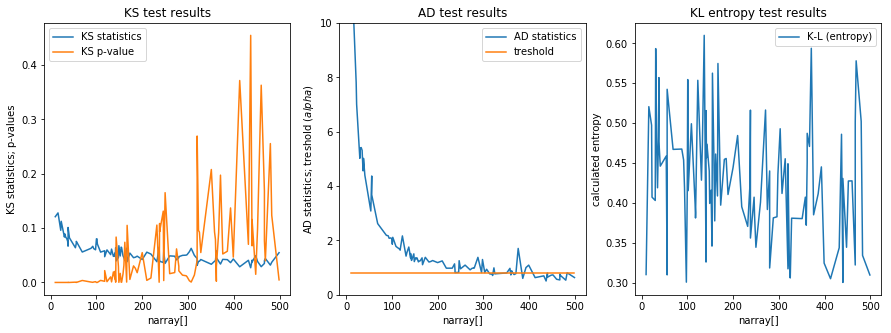

In [8]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.title('KS test results')
pl.xlabel('narray[]')
pl.ylabel('KS statistics; p-values')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title('AD test results')
pl.xlabel('narray[]')
pl.ylabel('AD statistics; treshold ($alpha$)')
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.title('KL entropy test results')
pl.xlabel('narray[]')
pl.ylabel('calculated entropy')
pl.legend();

# Repeat the exercise for the Poisson distribution increasing the lambda parameter of the distribution

In [9]:
ks_s_p = np.zeros(100)
ks_p_p = np.zeros(100)
ad_p = np.zeros(100)
kl_p = np.zeros(100)
chi_s_p = np.zeros(100)
chi_p_p = np.zeros(100)

In [11]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,L in enumerate(narray):
    #generate the distribution
    dist_poi = (np.random.poisson(L, 1000) - L ) / np.sqrt(L)
    #run the tests. 
    ks_s_p[i] = scipy.stats.kstest(dist_poi,'norm')[0]
    ks_p_p[i] = scipy.stats.kstest(dist_poi,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_p[i] = scipy.stats.anderson(dist_poi, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist_poi), max(dist_poi), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_p[i] =  scipy.stats.entropy(np.histogram(dist_poi, bins=mybins)[0]/1000., 
                                    scipy.stats.norm.pdf(bincenters))
    # Pearson's chisq
    chi_s_p[i] = scipy.stats.chisquare(np.histogram(dist_poi, bins=mybins)[0]/1000, 
                                    scipy.stats.norm.pdf(bincenters))[0]
    chi_p_p[i] = scipy.stats.chisquare(np.histogram(dist_poi, bins=mybins)[0]/1000, 
                                    scipy.stats.norm.pdf(bincenters))[1]

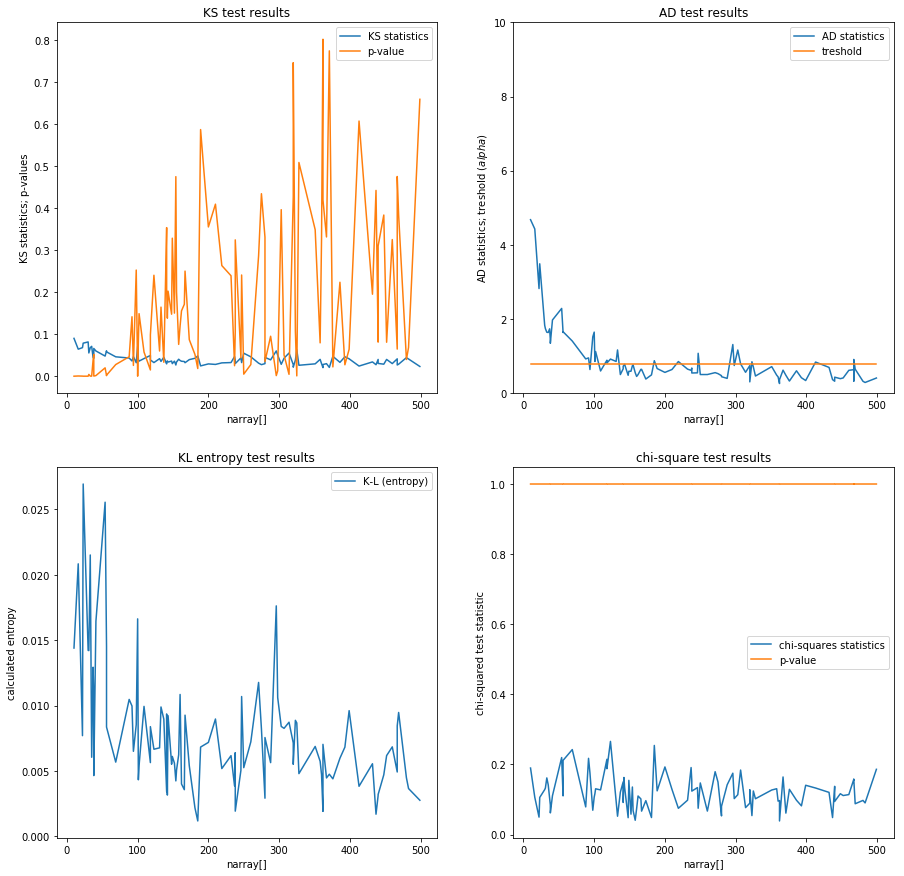

In [14]:
fig = pl.figure(figsize = (15,15))
fig.add_subplot(221)
pl.plot(narray, ks_s_p, label='KS statistics')
pl.plot(narray, ks_p_p, label='p-value')
pl.title('KS test results')
pl.xlabel('narray[]')
pl.ylabel('KS statistics; p-values')
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_p,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title('AD test results')
pl.xlabel('narray[]')
pl.ylabel('AD statistics; treshold ($alpha$)')
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_p, label='K-L (entropy)')
pl.title('KL entropy test results')
pl.xlabel('narray[]')
pl.ylabel('calculated entropy')
pl.legend();

fig.add_subplot(224)
pl.plot(narray, chi_s_p, label='chi-squares statistics')
pl.plot(narray, chi_p_p, label='p-value')
pl.title('chi-square test results')
pl.xlabel('narray[]')
pl.ylabel('chi-squared test statistic')
pl.legend();

### NOTE on KL divergence: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other in terms of information content. You can see what it looks point by point, before you integrate and get a single distance number

### example from skeleton notebook:

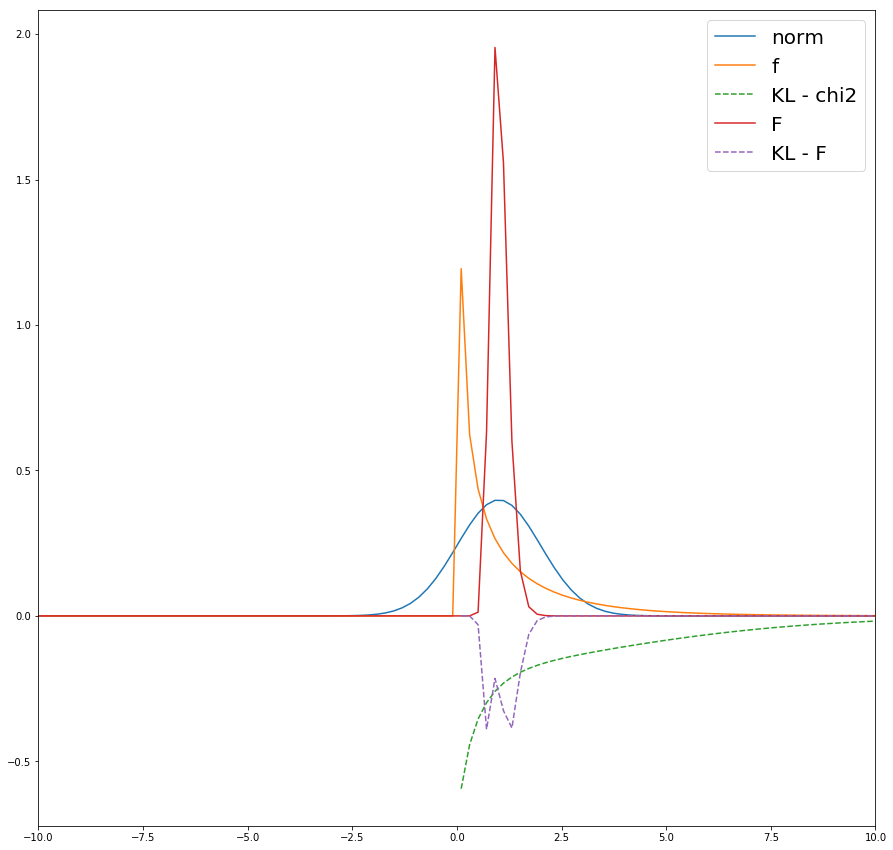

In [15]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);